In [77]:
# CO line conversions routines 

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

In [79]:
cosmo = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.315)

In [80]:
# Table 4 from Bothwell

J = np.array([2,3,4,5,6,7])



r_J = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
r_J_err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])

invr_J = 1./r_J 
invr_J_err = 1/r_J * np.sqrt((r_J_err/r_J)**2)


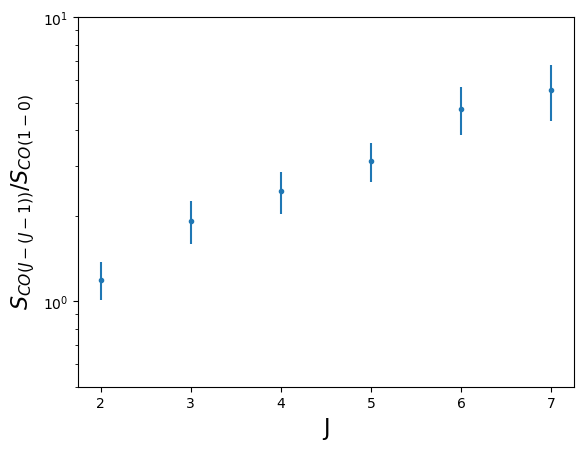

In [81]:
plt.errorbar(J,invr_J,yerr=invr_J_err,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$S_{CO(J-(J-1))}$/$S_{CO(1-0)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")

plt.savefig("CO_conversion.png",dpi=150)

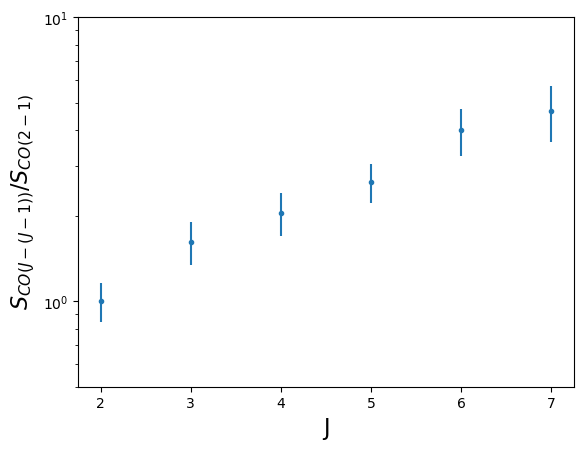

In [82]:
plt.errorbar(J,invr_J*0.84,yerr=invr_J_err*0.84,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$S_{CO(J-(J-1))}$/$S_{CO(2-1)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")


In [83]:
#Conversion from J-(J-1) to 1-0
def toC10(J,S,S_err):
    """
    Converts from a line flux J-(J-1) to 1-0 using
    Bothwell et al. 2013 Table 4 (MNRAS 429 3047)
    
    J: CO upper line transition [2,3,4,5,6,7] (int)
    S: CO line flux [Jy km/s] (float)
    S_err: CO line flux uncertainty [Jy km/s](float)
    
    usage: for example to convert a line flux from
    CO(3-2) that has flux 10 pm 1 (Jy km/s) we use 
    toC10(3,10,1)
    """
    val = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
    err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])
    
    S_c = val[J-2]*S
    S_c_err = S_c*np.sqrt((S_err/S)**2+(err[J-2]/val[J-2])**2)
    return S_c,S_c_err


In [84]:
def LpCO(I,nu,z):
    """
    Calculates the Apparent CO line Luminosity from the line intensity, 
    frequency and redshift assuming a Planck Cosmology framework
    
    I: CO(1-0) line intensity [Jy km/s]
    nu: Frequency [GHz]
    z: redshift
    
    return: Apparent Luminosity of the CO emission line [K km/s pc^2]
    """
    DL = cosmo.luminosity_distance(1+z).value
    return 3.25e7*I*(nu**(-2))*(DL**2)*((1+z)**(-3))

In [85]:
cosmo.luminosity_distance(1+2).value 

26018.354552401575

In [86]:
LpCO(10,90,3)*1e-11

8.422228173871058

In [87]:
#ID T ra dec z ICO ICOe SN V V_e LpCO LpCO_err LpCO10 LpCO10_err log10 M(H2) log10 M(H2)_err   
#0  1  2  3  4  5   6    7 8  9   10    11       12      13         14            15

ID,LpCO,LpCO_err,LpCO10,LpCO10_err = np.genfromtxt("Bothwell_2013",
                            usecols=(0,10,11,12,13),unpack=True,dtype=str)
ID,T,z,ICO,ICOe,V,V_e = np.genfromtxt("Bothwell_2013",
                            usecols=(0,1,4,5,6,8,9),unpack=True,dtype=str)
LpCO10 = np.array(LpCO10,dtype=float)
LpCO10_err = np.array(LpCO10_err,dtype=float)
V = np.array(V,dtype=float)
V_e = np.array(V_e,dtype=float)

In [88]:
#ID T z V Ve ICO ICOe LpCO LpCOe nu
#0  1 2 3 4   5   6     7    8   9

A16_ID,A16_V,A16_Ve,A16_LpCO,A16_LpCOe = np.genfromtxt("Aravena_2016",
                            usecols=(0,3,4,7,8),unpack=True,dtype=str)
A16_V = np.array(A16_V,dtype=float)
A16_Ve = np.array(A16_Ve,dtype=float)
A16_LpCO = np.array(A16_LpCO,dtype=float)*10
A16_LpCOe = np.array(A16_LpCOe,dtype=float)*10

In [89]:
#ID z ze SCO SCOe V Ve ICO ICOe LpCO LpCOerr 
#0  1  2  3   4   5  6  7   8    9     10

H12_ID,H12_V,H12_Ve,H12_LpCO,H12_LpCOe = np.genfromtxt("Harris_2012",
                         usecols=(0,5,6,9,10),unpack=True,dtype=str)
H12_V = np.array(H12_V,dtype=float)
H12_Ve = np.array(H12_Ve,dtype=float)
H12_LpCO = np.array(H12_LpCO,dtype=float)
H12_LpCOe = np.array(H12_LpCOe,dtype=float)

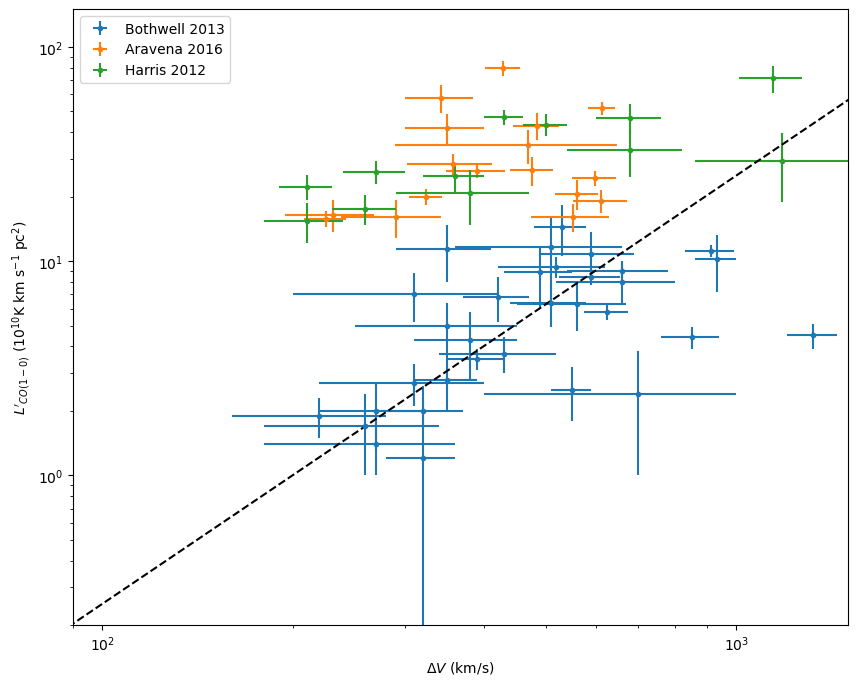

In [90]:

x0 = np.linspace(80,2000)
y0 = 10**5.4*x0**2/1e10



plt.figure(figsize=(10,8))

plt.errorbar(V,LpCO10,xerr=V_e,yerr=LpCO10_err,fmt=".",label="Bothwell 2013")

plt.errorbar(A16_V,A16_LpCO,xerr=A16_Ve,yerr=A16_LpCOe,fmt=".",label="Aravena 2016")
plt.errorbar(H12_V,H12_LpCO,xerr=H12_Ve,yerr=H12_LpCOe,fmt=".",label="Harris 2012")


plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\Delta V$ (km/s)")
plt.ylabel(r"$L'_{CO(1-0)}$ ($10^{10}$K km s$^{-1}$ pc$^2$)")

plt.plot(x0,y0,"--",color="black")

plt.ylim(0.2,150)

plt.xlim(90,1500)

plt.legend()